In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint
from math import ceil

In [2]:
np.random.seed(42)

In [3]:
def MINIMUM(A):
    min_val = A[0]
    for num in A:
        if num < min_val:
            min_val = num
    
    return min_val

In [4]:
def MAXIMUM(A):
    max_val = A[0]
    for num in A:
        if num > max_val:
            max_val = num
    
    return max_val

In [5]:
def MINIMUM_AND_MAXIMUM(A):
    
    n = len(A)
    
    # VERIFICANDO A PARIDADE 
    if n % 2 == 1:  # n é ímpar
        mini = A[0]
        maxi = A[0]
        start_index = 1  # segundo elemento
    else:  # n é par
        if A[0] < A[1]:
            mini = A[0]
            maxi = A[1]
        else:
            mini = A[1]
            maxi = A[0]
        start_index = 2  # Começa a processar do terceiro elemento

    # processando o resto do vetor em pares
    for i in range(start_index, n, 2):
        if i + 1 < n:
            # comparando o par (A[i], A[i + 1])
            if A[i] < A[i + 1]:
                pair_min, pair_max = A[i], A[i + 1]
            else:
                pair_min, pair_max = A[i + 1], A[i]

            # atualiza o mini e maxi, se precisar
            if mini > pair_min:
                mini = pair_min
            if maxi < pair_max:
                maxi = pair_max

    return mini, maxi

In [6]:
size = 10000000
A = np.random.choice(range(size * 10), size, replace=False)

In [7]:
start = time.time()
MINIMUM(A)
MAXIMUM(A)
end = time.time()
print (end - start)

1.517263412475586


In [8]:
start = time.time()
MINIMUM_AND_MAXIMUM(A)
end = time.time()
print (end - start)

2.505509853363037


In [9]:
def find_min_and_max_separate(arr):
    if len(arr) == 0:
        return None, None
    
    mini = arr[0]
    maxi = arr[0]
    
    for num in arr:
        if num < mini:
            mini = num
        if num > maxi:
            maxi = num
    
    return mini, maxi

In [10]:
def find_min_and_max_simultaneous(arr):
    n = len(arr)
    if n == 0:
        return None, None

    if n % 2 == 1:  # n é ímpar
        mini = arr[0]
        maxi = arr[0]
        start_index = 1
    else:  # n é par
        if arr[0] < arr[1]:
            mini = arr[0]
            maxi = arr[1]
        else:
            mini = arr[1]
            maxi = arr[0]
        start_index = 2

    for i in range(start_index, n, 2):
        if i + 1 < n:
            if arr[i] < arr[i + 1]:
                pair_min, pair_max = arr[i], arr[i + 1]
            else:
                pair_min, pair_max = arr[i + 1], arr[i]

            if mini > pair_min:
                mini = pair_min
            if maxi < pair_max:
                maxi = pair_max

    return mini, maxi

In [11]:
def measure_time(algorithm, arr, repetitions=100):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        algorithm(arr)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    return np.mean(times)

In [12]:
sizes = [1000, 1500, 2000, 2500, 3000, 3500, 3501, 5000, 5001,  10000, 15000, 30000, 50000, 100000, 1000000, 554742,
 741490,
 231646,
 203332,
 355092,
 482689,
 228333,
 981943,
 262172,
 391796,
 610872,
 618161,
 228236,
 790368,
 460212,
 118029,
 641847,
 58739,
 811879,
 767970,
 378751,
 286715,
 820569,
 727831,
 388098,
 437712,
 98181,
 188960,
 432497,
 384107,
 664109,
 745264,
 606511,
 526761,
 77534,
 81620,
 125246,
 828252,
 138634,
 414949 ]
repetitions = 100

In [13]:
times_separate = []
times_simultaneous = []

In [14]:
for size in sizes:
    arr = np.random.choice(range(size * 10), size, replace=False)
    
    time_separate = measure_time(find_min_and_max_separate, arr, repetitions)
    times_separate.append(time_separate)
    
    time_simultaneous = measure_time(find_min_and_max_simultaneous, arr, repetitions)
    times_simultaneous.append(time_simultaneous)

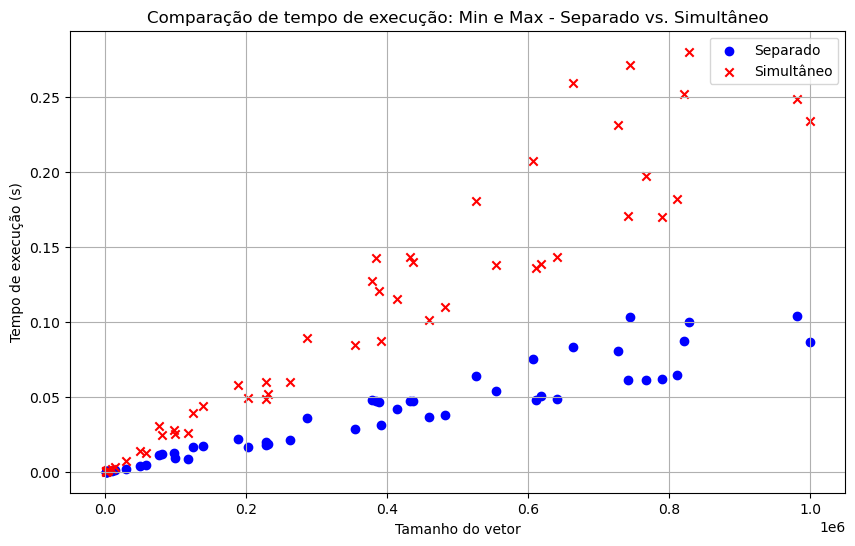

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(sizes, times_separate, color='blue', label='Separado', marker='o')
plt.scatter(sizes, times_simultaneous, color='red', label='Simultâneo', marker='x')

plt.xlabel("Tamanho do vetor")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação de tempo de execução: Min e Max - Separado vs. Simultâneo")
plt.legend()
plt.grid(True)
plt.show()